In [107]:
import matplotlib.pyplot as plt
from handling import get_templates
import numpy as np

def show_object_and_mask(img_obj_RGB, img_obj_alpha):
    
    if img_obj_RGB is not None and img_obj_alpha is not None:
        plt.subplot(1, 2, 1)
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.subplot(1, 2, 2)
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()
    
    elif img_obj_RGB is None:
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()

    else:
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.show()

In [144]:
import config
from augmentation import AugmentationGenerator
import math

src_imgs = get_templates(["cylinder"], r"C:\Users\tsx10\PythonProjectsJupyter\TUM\MA\Paste-Step-new\data\synthetic_images\02_imgs\original")

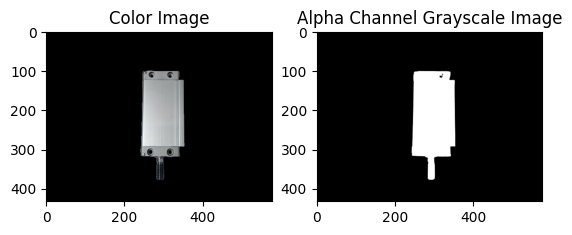

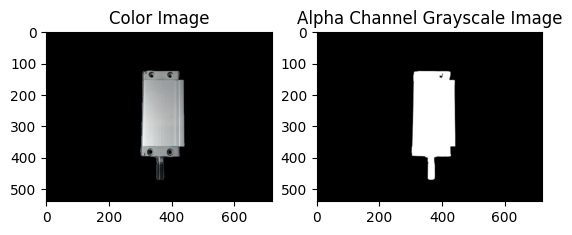

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


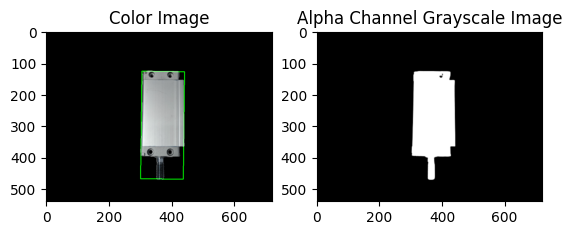

In [160]:
import cv2

obj_choice = np.random.randint(0, len(src_imgs))

augmentationGenerator = AugmentationGenerator(**config.config_parameters['aug_params'])

img = src_imgs[obj_choice][np.random.randint(0, len(src_imgs[np.random.randint(0, len(src_imgs))]))]

show_object_and_mask(img[:, :, :3], img[:, :, 3])

img = cv2.resize(img, (720, 540), cv2.INTER_LINEAR)
# img = src_imgs[obj_choice][np.random.randint(0, len(src_imgs[np.random.randint(0, len(src_imgs))]))]

show_object_and_mask(img[:, :, :3], img[:, :, 3])

# cv2.GaussianBlur(img[:, :, 3].copy().astype(np.uint8), (7, 7), sigmaX=0.5)

contours, _ = cv2.findContours(img[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

box = cv2.boxPoints(rect)
box = np.intp(box)
rect_image = np.zeros_like(img[:, :, :3])
cv2.drawContours(rect_image, [box], 0, (0, 255, 0), 2)

img[:, :, :3] = cv2.addWeighted(img[:, :, :3], 1, rect_image, 0.5, 0)

show_object_and_mask(img[:, :, :3], img[:, :, 3])

In [ ]:
import cv2

obj_choice = np.random.randint(0, len(src_imgs))

augmentationGenerator = AugmentationGenerator(**config.config_parameters['aug_params'])

img = cv2.resize(src_imgs[obj_choice][np.random.randint(0, len(src_imgs[np.random.randint(0, len(src_imgs))]))], (720, 540), cv2.INTER_LINEAR)

show_object_and_mask(img[:, :, :3], img[:, :, 3])

obj = augmentationGenerator.resize_object(img, obj_choice, scale=1)

show_object_and_mask(obj[:, :, :3], obj[:, :, 3])

max_border = math.ceil(np.max(obj.shape) * 1.1)
object_background = np.zeros((max_border, max_border, 4))

x_place = math.ceil(max_border/2 - obj.shape[1]/2)
y_place = math.ceil(max_border/2 - obj.shape[0]/2)

object_background[y_place:y_place+obj.shape[0], x_place:x_place+obj.shape[1]] = obj

show_object_and_mask(object_background[:, :, :3], object_background[:, :, 3])

1.1224570471923996


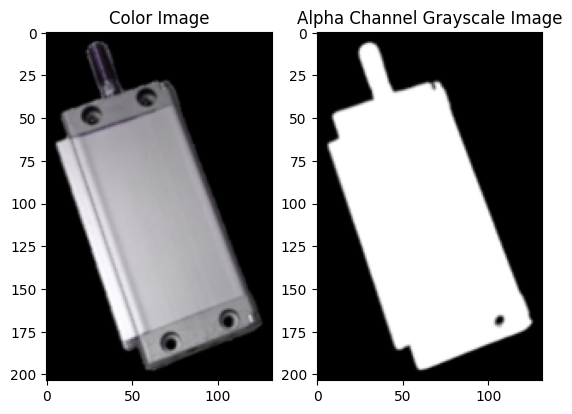

In [196]:
import config
from augmentation import AugmentationGenerator
import random

src_imgs = get_templates(["cylinder"], r"C:\Users\tsx10\PythonProjectsJupyter\TUM\MA\Paste-Step-new\data\synthetic_images\02_imgs")
obj_choice = np.random.randint(0, len(src_imgs))

scale = random.uniform(0.5, 1.5)
print(scale)

augmentationGenerator = AugmentationGenerator(**config.config_parameters['aug_params'])
obj = augmentationGenerator.img_aug(src_imgs, obj_choice, scale)

show_object_and_mask(obj[:, :, :3], obj[:, :, 3])

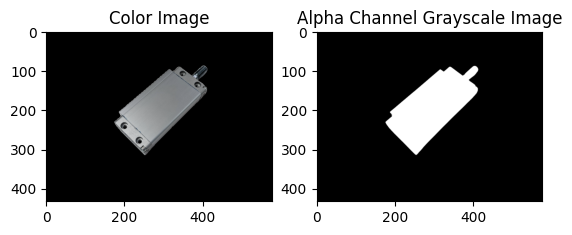

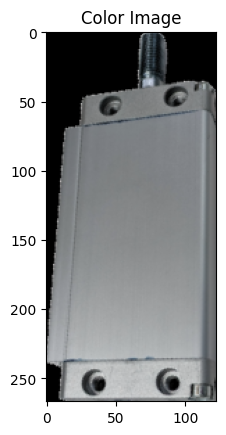

In [126]:
import config

src_imgs = get_templates(["cylinder", "plate", "usb"], r"C:\Users\tsx10\PythonProjectsJupyter\TUM\MA\Paste-Step-new\data\synthetic_images\02_imgs")
size_x = 720
size_y = 540

obj = src_imgs[np.random.randint(0, len(src_imgs))][np.random.randint(0, len(src_imgs[np.random.randint(0, len(src_imgs))]))]

show_object_and_mask(obj[:, :, :3], obj[:, :, 3])

import cv2

contours, _ = cv2.findContours(obj[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

angle = rect[2]

# 获取最小外接矩形的长和宽
width = int(rect[1][0])
height = int(rect[1][1])

# 创建旋转矩阵
rotation_matrix = cv2.getRotationMatrix2D(tuple(rect[0]), angle, 1)

# 对图像进行仿射变换，使最小外接矩形水平
rotated_image = cv2.warpAffine(obj[:, :, :3], rotation_matrix, (obj[:, :, :3].shape[1], obj[:, :, :3].shape[0]))

# 裁剪图像
cropped_image = rotated_image[int(rect[0][1]-height/2):int(rect[0][1]+height/2), int(rect[0][0]-width/2):int(rect[0][0]+width/2)]

show_object_and_mask(cropped_image, None)

C:\Users\tsx10\AppData\Local\Temp\ipykernel_33632\2141477441.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


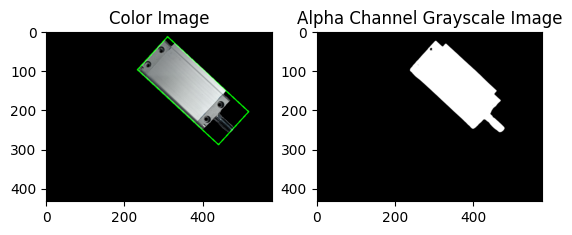

In [95]:
box = cv2.boxPoints(rect)
box = np.int0(box)
rect_image = np.zeros_like(obj[:, :, :3])
cv2.drawContours(rect_image, [box], 0, (0, 255, 0), 2)

obj[:, :, :3] = cv2.addWeighted(obj[:, :, :3], 1, rect_image, 0.5, 0)

show_object_and_mask(obj[:, :, :3], obj[:, :, 3])

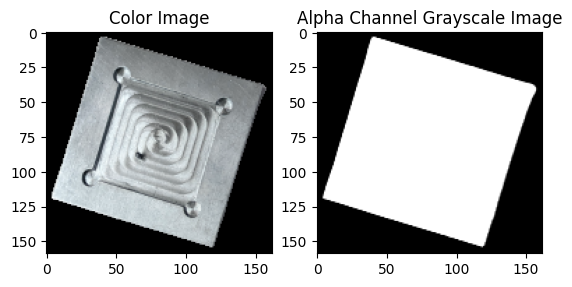

In [ ]:
import cv2

# select random image from pool
obj_choice = np.random.randint(0, len(src_imgs))
img = src_imgs[1][np.random.randint(0, len(src_imgs[1]))]

# select roi
cnts, _ = cv2.findContours((img[:, :, 3].copy()).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(np.concatenate(cnts))
object = img[y-5:y+h+5, x-5:x+w+5]

show_object_and_mask(object[:, :, :3], object[:, :, 3])

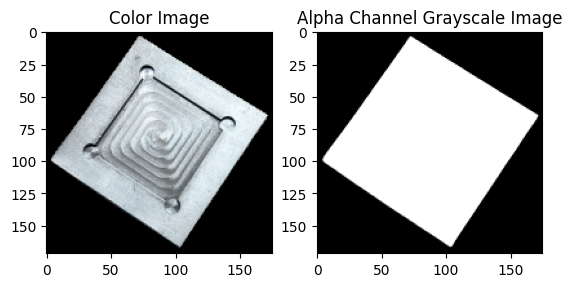

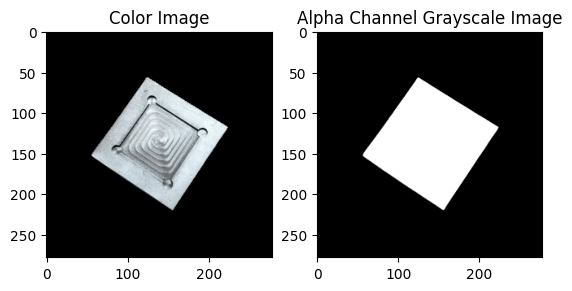

In [ ]:
import math
import cv2
from torchvision.transforms import v2
from torchvision.transforms import InterpolationMode
import skimage.transform as transform

# select random image from pool
obj_choice = np.random.randint(0, len(src_imgs))
img = src_imgs[1][np.random.randint(0, len(src_imgs[obj_choice]))]

# select roi
cnts, _ = cv2.findContours((img[:, :, 3].copy()).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(np.concatenate(cnts))
object = img[y-5:y+h+5, x-5:x+w+5]

show_object_and_mask(object[:, :, :3], object[:, :, 3])

diagonal = math.ceil(np.sqrt(np.square(w)+np.square(h))*1.2)
object_background = np.zeros((diagonal, diagonal, 4))
x_place = math.ceil(diagonal/2 - w/2)
y_place = math.ceil(diagonal/2 - h/2)
object_background[y_place-5:y_place+h+5, x_place-5:x_place+w+5] = object

show_object_and_mask(object_background[:, :, :3], object_background[:, :, 3])

In [ ]:
import numpy as np
import random

def random_point(overlay_channel, margin_right, margin_bottom):

    size_y, size_x = overlay_channel.shape
    cut_mask = overlay_channel[:size_y-margin_bottom, :size_x-margin_right]
    zero_coords = np.column_stack(np.where(cut_mask == 0))
    
    if len(zero_coords) > 0:
        random_point = random.choice(zero_coords)
        return tuple(random_point)
    else:
        return None


In [5]:
a = (1, 2)
a[0]

1